In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [4]:
# import meals data
meals = pd.read_csv("backend/data/meal_history.csv")
meals.head()

,Date,TypeOfMeal,DishName,Calories,Protein,Fruits,Vegetables,Grains,Dairy,Link
0,6/24/25,Breakfast,Milk,149,0.0,0.0,0.00,0.0,1.0,NaN
1,6/24/25,Breakfast,Sweet potato hash with egg,300,2.5,0.0,1.00,0.0,0.0,https://www.myplate.gov/recipes/sweet-potato-h...
2,6/24/25,Lunch,chicken fried rice,340,1.5,0.0,0.25,2.0,0.0,https://www.myplate.gov/recipes/fried-rice
3,6/24/25,Dinner,Fish tacos,220,2.0,0.0,0.75,2.0,0.0,https://www.myplate.gov/recipes/simple-fish-tacos
4,6/24/25,Snack,Very berry smoothie,250,0.0,2.5,0.00,0.0,1.0,https://www.myplate.gov/recipes/very-berry-smo...


<Axes: xlabel='Date', ylabel='Calories'>

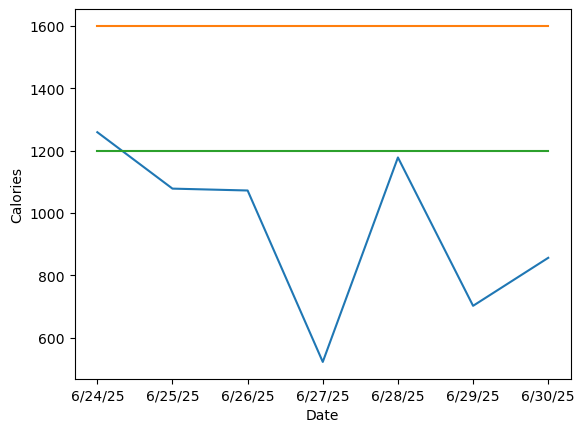

In [14]:
#line graph of total calories by day. 
group_by_date = meals.groupby("Date")[["Calories", "Protein", "Grains", "Vegetables", "Dairy"]].sum()

group_by_date["Max Calories"] = 1600
group_by_date["Min Calories"] = 1200

sns.lineplot(data=group_by_date, x="Date", y="Calories",)
sns.lineplot(data=group_by_date,x="Date", y="Max Calories")
sns.lineplot(data=group_by_date,x="Date", y="Min Calories")


([<matplotlib.patches.Wedge at 0x179bec1a0>,
 [Text(0.7625248090722323, 0.7928151837278066, 'Protein'),
  Text(-0.6985222443046399, 0.8497450642466886, 'Fruits'),
  Text(-0.9405061153905641, -0.5704807156363405, 'Vegetables'),
  Text(0.2961783526664991, -1.0593764125237823, 'Grains'),
  Text(1.017628076017178, -0.41765188722377006, 'Dairy')],
 [Text(0.41592262313030853, 0.43244464566971264, '26%'),
  Text(-0.38101213325707634, 0.463497307770921, '21%'),
  Text(-0.5130033356675803, -0.31117129943800387, '25%'),
  Text(0.1615518287271813, -0.5778416795584267, '17%'),
  Text(0.5550698596457334, -0.22781012030387454, '12%')])

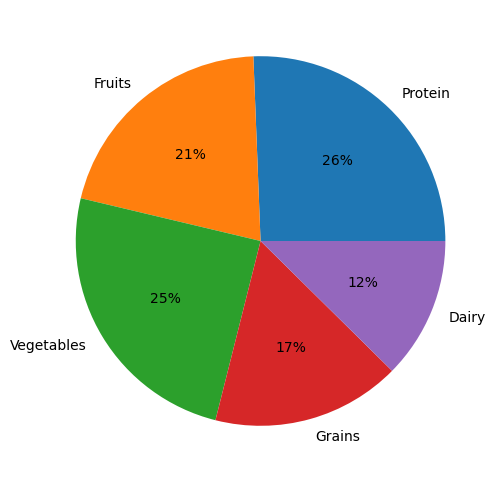

In [35]:
#group by date, display protein, fruits, vegetables, grain, dairy
food_groups = group_by_date[["Protein", "Grains", "Vegetables", "Dairy"]]

#filter out a date
meal_df = meals[(meals['Date'] == '6/27/25')]
group_totals = meal_df[['Protein', 'Fruits', 'Vegetables', 'Grains', 'Dairy']].sum()
group_totals = group_totals[group_totals > 0]

plt.figure(figsize=(6,6))
plt.pie(
    group_totals,
    labels=group_totals.index,
    autopct='%1.0f%%'
)